# Simple linear regression
Predicting 'sales' using applicable predictor variable
### 1. Reading and understanding the data
### 2. Training the model
### 3. Residual Analysis
### 4. Predicting the test set and evaluating it

# Step-1: Reading and Understanding data


### 1. Importing data using pandas library
### 2. Understanding the structure of the data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#read the data
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#  to show rows and columns
advertising.shape

(200, 4)

In [4]:
#Gives summary about numerical data like mean,median,quartiles(Five number summary)
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# Finds missing values
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: xlabel='TV', ylabel='Sales'>

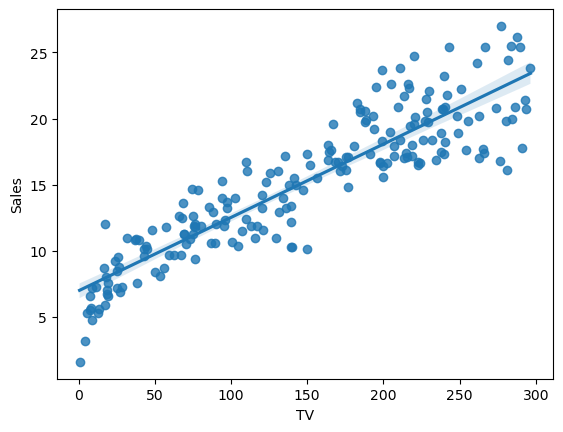

In [6]:
# Visualize the data
sns.regplot(x="TV",y="Sales",data=advertising)

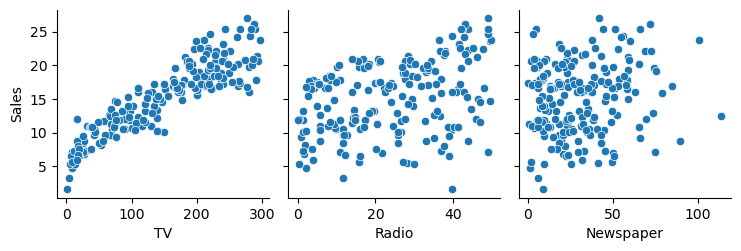

In [7]:
sns.pairplot(data=advertising,
             x_vars=["TV","Radio",'Newspaper'], y_vars="Sales")


<Axes: >

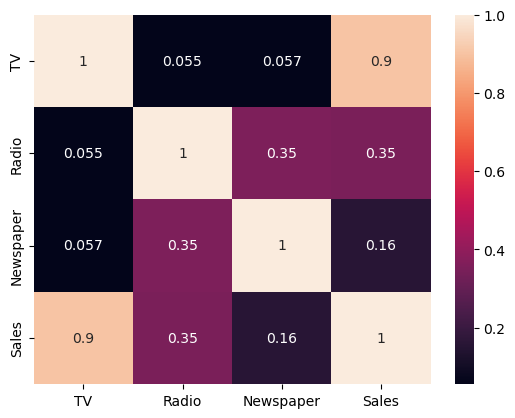

In [8]:
advertising.corr()
sns.heatmap(advertising.corr(),annot=True)

# Step 2 : Performing simple linear regression
### Equation for linear regression
y = c+m1x1 +m2x2+m3x3+...+mnxn
### Here  y  = c + m1*TV 
## Steps:-
1. Create x and y
2. create train and test sets(70-30, 80-20)
3. Train model on training set(Learn the coefficients)
4. Evaluate The model(Train set, Test set)

In [9]:
# Create X and y
X = advertising['TV']
y = advertising['Sales']

In [10]:
# Train Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size =0.70, random_state=100)

In [11]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [12]:
# Train the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [13]:
# fitting the model
lr = sm. OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params 

const    6.948683
TV       0.054546
dtype: float64

In [14]:
# sales = 6.94 + 0.05 *TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.52e-52
Time:                        19:41:11   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#1. coef and p_value
#2. R squared is 81.6% , very high
#3. p(F-statistic) is low

In [17]:
y_train_pred = lr_model.predict(X_train_sm)

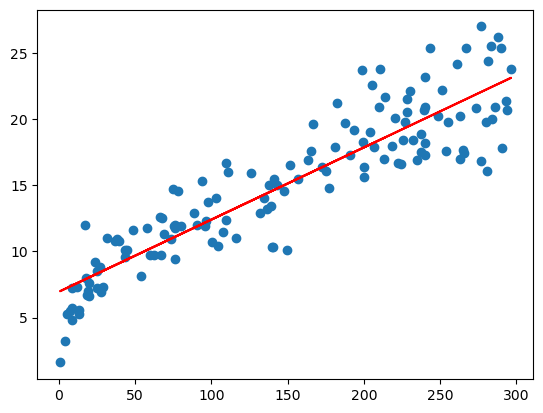

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred,'r')
plt.show()

## Step 3: Residual Analysis

In [21]:
# error = f(y_train, y_train_pred)

In [22]:
res = y_train-y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

C:\Users\mamul\AppData\Local\Temp\ipykernel_14560\174580735.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual Plot')

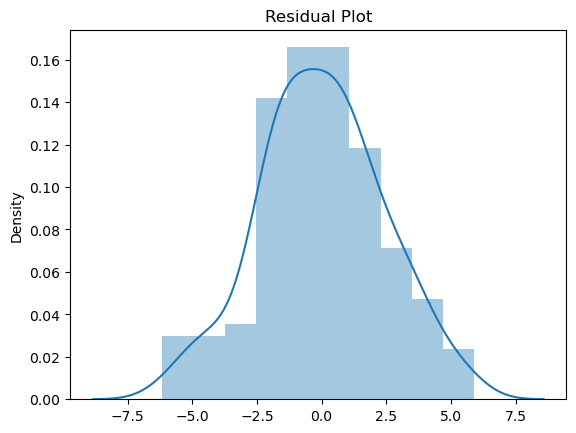

In [24]:
# Plot the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

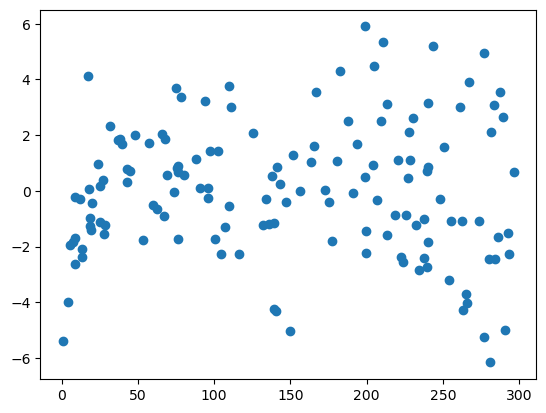

In [25]:
# Look for patterns in residuals(we should not be able to identify)
plt.scatter(X_train, res)
plt.show()


## Step-4 : Prediction and evaluation of the test set


In [26]:
# Prediction on the test set(y_test_pred)
# evaluate the model, r squared on the test

In [27]:
#add a constant or intercept to test
X_test_sm = sm.add_constant(X_test)
# Pred on test
y_test_pred = lr_model.predict(X_test_sm)

In [29]:
# evaluate the model, r squared, on the test
# r squared

In [30]:
r2= r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7921031601245658

In [31]:
# r2 on train
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8157933136480389

In [32]:
# Mean square error
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826956

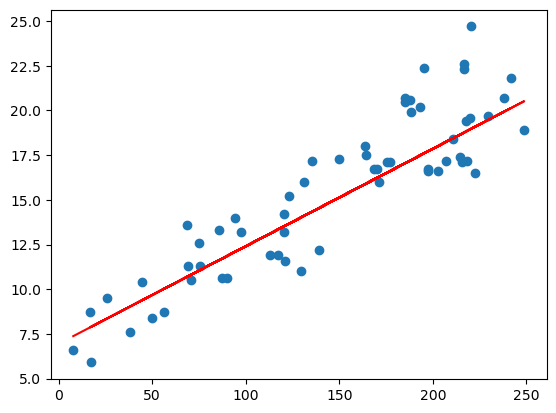

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred,'r')
plt.show()

In [39]:
X_train_lm=X_train.values.reshape(-1,1)

In [40]:
y_train_lm= y_train.values.reshape(-1,1)

In [41]:
X_test_lm = X_test.values.reshape(-1,1)

In [42]:
y_test_lm= y_test.values.reshape(-1,1)

In [43]:
X_train_lm.shape
y_train_lm.shape

(140, 1)

LINEAR REGRESSION USING sklearn


In [44]:
# step-1 Create an object of linear regression
lm = LinearRegression()
# step-2 fit the model
lm.fit(X_train_lm,y_train)


LinearRegression()

In [45]:
# step-3 See the parameters , make prediction
print(lm.coef_)
print(lm.intercept_)


[0.05454575]
6.9486832000013585


In [46]:
# step -4 Make predictions
y_train_pred= lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [47]:
# evaluate the model
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480388
0.792103160124566
